**Anggota Kelompok** <br>

> Nathanael Theovanny Averro,  1806208434 <br>
Sergio Fadjar,               1806208522 <br>
Kevin Halim,                 1806208554



**Permasalahan yang Diberikan**<br>
Sumber: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction<br><br>
Diberikan dataset berisi sejumlah informasi dari pemegang polis suatu perusahaan asuransi India. Perusahaan asuransi tersebut berencana memasarkan produk asuransi kendaraan kepada para pemegang polis produk asuransi kesehatannya. Dengan berbekal dataset tersebut, Anda ditantang untuk membangun suatu model yang dapat memprediksi apakah customer akan tertarik dengan produk asuransi kendaraan yang ditawarkan perusahaan tsb. Dari model yang Anda bangun, perusahaan dapat merancang strategi komunikasi dan pemasarannya untuk dapat menggaet customer lebih banyak lagi serta dapat mengoptimasi model bisnis dan pemasukannya.<br><br>
Berikut penjelasan untuk setiap kolom pada dataset.
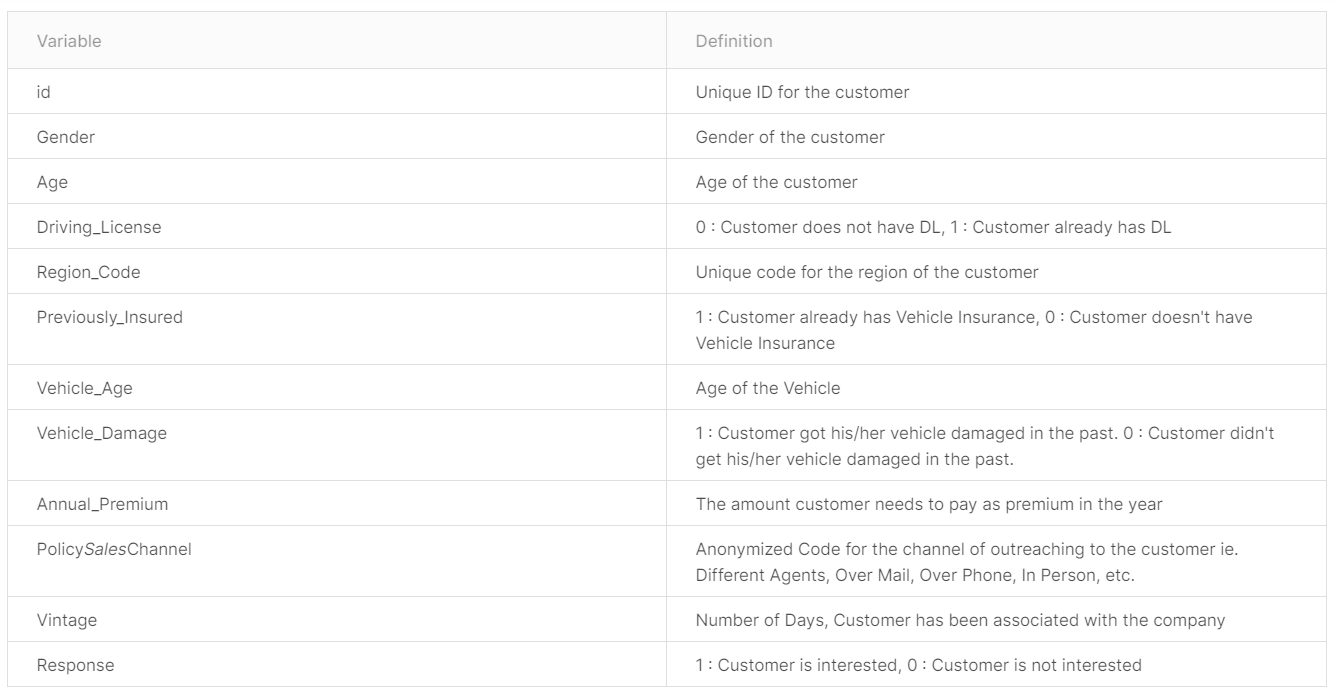

# Load Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

path = "C:/Users/Nathanael Theo/Downloads/train.csv"
df = pd.read_csv(path)
df=df.set_index('id')

In [2]:
df.head(6)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0


In [3]:
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

# Exploratory Data Analysis

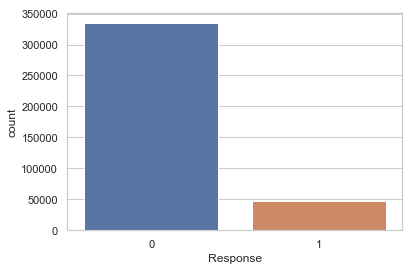

In [4]:
sns.countplot(df.Response)

In [5]:
df.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

**Age Distribution of Customers**

C:\Users\Nathanael Theo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


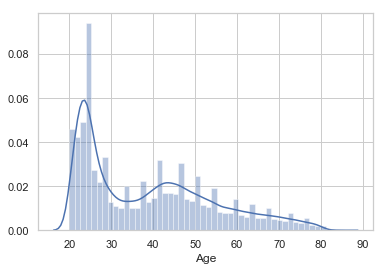

In [6]:
sns.distplot(df.Age)

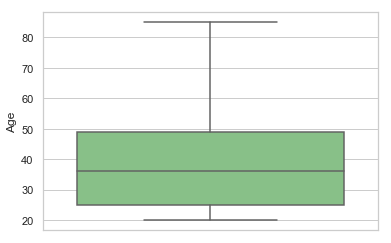

In [7]:
sns.boxplot(y = 'Age', data = df,palette='Accent')

**Age vs Annual Premium**

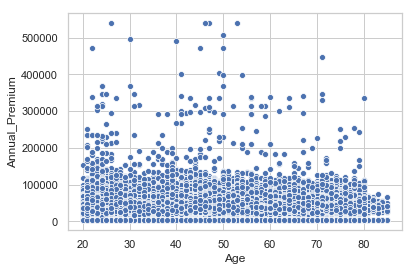

In [8]:
sns.scatterplot(x=df['Age'],y=df['Annual_Premium'])

**Gender and Response**

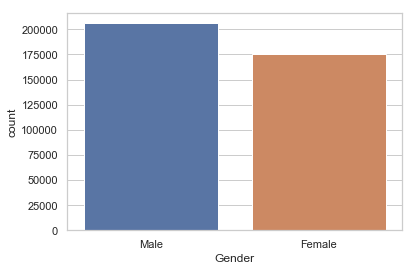

In [9]:
sns.countplot(df.Gender)

In [10]:
genderresp=df.groupby(['Gender'])['Response'].value_counts()

genderresp

Gender  Response
Female  0           156835
        1            18185
Male    0           177564
        1            28525
Name: Response, dtype: int64

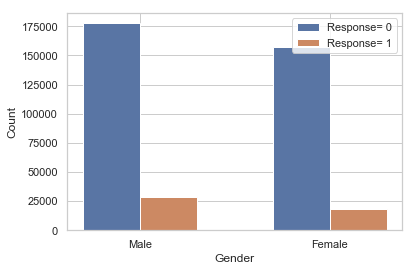

In [11]:
genderresp=df.groupby(['Gender'])['Response'].value_counts()

barWidth = 0.3
bars1 = [genderresp['Male',0], genderresp['Female',0]]
bars2 = [genderresp['Male',1], genderresp['Female',1]]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='#5975a4', width=barWidth, edgecolor='white', label='Response= 0')
plt.bar(r2, bars2, color='#cc8963', width=barWidth, edgecolor='white', label='Response= 1')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0.15,1.15], ['Male', 'Female'])
 
plt.legend()
plt.show()

In [12]:
df.groupby(['Driving_License'])['Response'].value_counts()

Driving_License  Response
0                0              771
                 1               41
1                0           333628
                 1            46669
Name: Response, dtype: int64

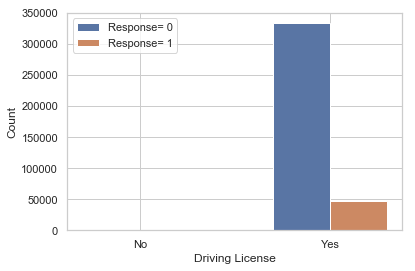

In [13]:
#Driving License and Response
license_resp=df.groupby(['Driving_License'])['Response'].value_counts()

barWidth = 0.3
bars1 = [license_resp[0,0], license_resp[1,0]]
bars2 = [license_resp[0,1], license_resp[1,1]]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='#5975a4', width=barWidth, edgecolor='white', label='Response= 0')
plt.bar(r2, bars2, color='#cc8963', width=barWidth, edgecolor='white', label='Response= 1')

plt.xlabel('Driving License')
plt.ylabel('Count')
plt.xticks([0.15,1.15], ['No', 'Yes'])
 
plt.legend()
plt.show()

**Customers having vehicle insurance already**

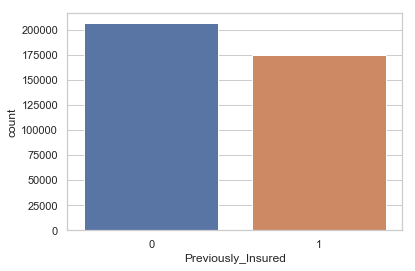

In [14]:
sns.countplot(df.Previously_Insured)

In [15]:
df.groupby(['Previously_Insured'])['Response'].value_counts()

Previously_Insured  Response
0                   0           159929
                    1            46552
1                   0           174470
                    1              158
Name: Response, dtype: int64

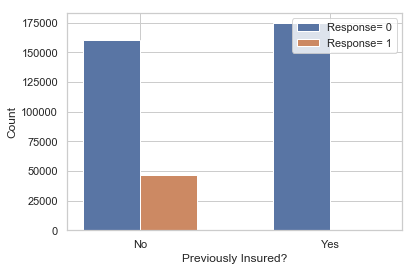

In [16]:
previnsured_resp=df.groupby(['Previously_Insured'])['Response'].value_counts()

barWidth = 0.3
bars1 = [previnsured_resp[0,0], previnsured_resp[1,0]]
bars2 = [previnsured_resp[0,1], previnsured_resp[1,1]]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='#5975a4', width=barWidth, edgecolor='white', label='Response= 0')
plt.bar(r2, bars2, color='#cc8963', width=barWidth, edgecolor='white', label='Response= 1')

plt.xlabel('Previously Insured?')
plt.ylabel('Count')
plt.xticks([0.15,1.15], ['No', 'Yes'])
 
plt.legend()
plt.show()

**Vehicle Age**

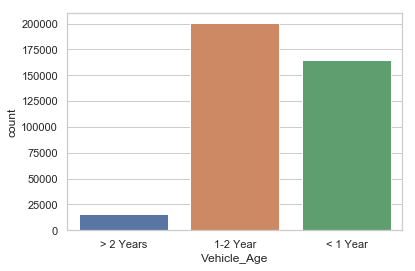

In [17]:
sns.countplot(df.Vehicle_Age)

In [18]:
df.groupby('Vehicle_Age')['Response'].value_counts()

Vehicle_Age  Response
1-2 Year     0           165510
             1            34806
< 1 Year     0           157584
             1             7202
> 2 Years    0            11305
             1             4702
Name: Response, dtype: int64

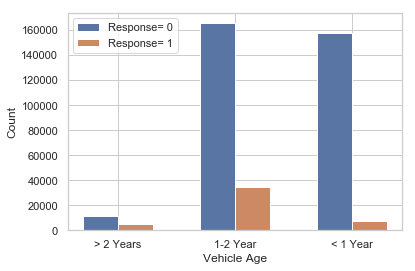

In [19]:
vehicleage_resp=df.groupby(['Vehicle_Age'])['Response'].value_counts()

barWidth = 0.3
bars1 = [vehicleage_resp["> 2 Years",0], vehicleage_resp["1-2 Year",0], vehicleage_resp["< 1 Year",0]]
bars2 = [vehicleage_resp["> 2 Years",1], vehicleage_resp["1-2 Year",1], vehicleage_resp["< 1 Year",1]]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='#5975a4', width=barWidth, edgecolor='white', label='Response= 0')
plt.bar(r2, bars2, color='#cc8963', width=barWidth, edgecolor='white', label='Response= 1')

plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.xticks([0.15,1.15,2.15], ['> 2 Years', '1-2 Year', '< 1 Year'])
 
plt.legend()
plt.show()

**Customers having damaged vehicle**

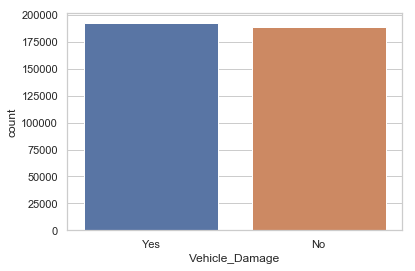

In [20]:
sns.countplot(df.Vehicle_Damage)

**Damaged Vehicle and Response**

In [21]:
df.groupby('Vehicle_Damage')['Response'].value_counts()

Vehicle_Damage  Response
No              0           187714
                1              982
Yes             0           146685
                1            45728
Name: Response, dtype: int64

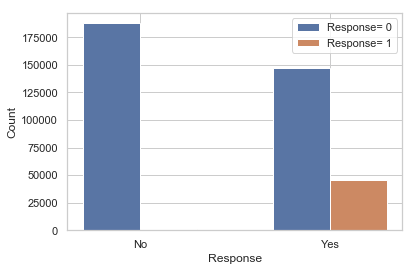

In [22]:
vehicledamage_resp=df.groupby(['Vehicle_Damage'])['Response'].value_counts()

barWidth = 0.3
bars1 = [vehicledamage_resp["No",0], vehicledamage_resp["Yes",0]]
bars2 = [vehicledamage_resp['No',1], vehicledamage_resp["Yes",1]]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='#5975a4', width=barWidth, edgecolor='white', label='Response= 0')
plt.bar(r2, bars2, color='#cc8963', width=barWidth, edgecolor='white', label='Response= 1')

plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks([0.15,1.15], ['No', 'Yes'])
 
plt.legend()
plt.show()

**Annual Premium Distribution**

C:\Users\Nathanael Theo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


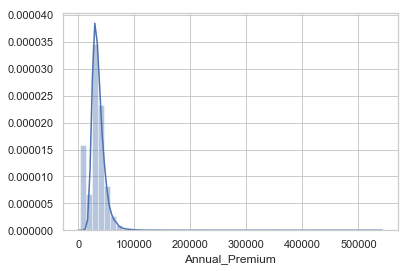

In [23]:
sns.distplot(df.Annual_Premium)

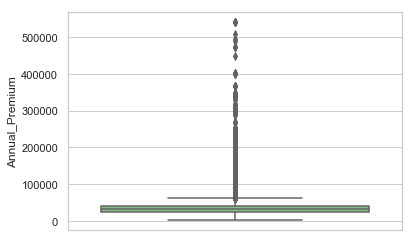

In [24]:
sns.boxplot(y = 'Annual_Premium', data = df,palette='Accent')

**Vintage**

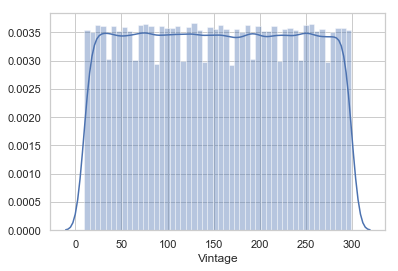

In [25]:
sns.distplot(df.Vintage)

# Data Preprocessing

In [26]:
df[['Vehicle_Age']].describe() #kategorik, perlu diubah ke dummy variable

,Vehicle_Age
count,381109
unique,3
top,1-2 Year
freq,200316


In [27]:
df[['Vehicle_Damage']].describe() #kategorik, perlu diubah ke dummy variable

,Vehicle_Damage
count,381109
unique,2
top,Yes
freq,192413


**Membuat semua variabel kategorik menjadi dummy**

In [28]:
#transform vehicle damage jadi 0 1
VDdummy=pd.get_dummies(df['Vehicle_Damage'])
df['Vehicle_Damage']=VDdummy['Yes']
df[['Vehicle_Damage']].head(10)

,Vehicle_Damage
id,
1,1
2,0
3,1
4,0
5,0
6,1
7,1
8,1
9,0


In [29]:
df.head(5) #perht vehicle_damage jadi 0 1

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [30]:
df['Region_Code']=df['Region_Code'].astype(int)
df['Policy_Sales_Channel']=df['Policy_Sales_Channel'].astype(int)

In [31]:
RCdummy=pd.get_dummies(df['Region_Code'],prefix='RegionCode')
df=pd.concat([df,RCdummy],axis=1)
df=df.drop(columns='Region_Code')
df=df.drop(columns='RegionCode_52')
df.head(5)

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,...,RegionCode_42,RegionCode_43,RegionCode_44,RegionCode_45,RegionCode_46,RegionCode_47,RegionCode_48,RegionCode_49,RegionCode_50,RegionCode_51
id,,,,,,,,,,,,,,,,,,,,,
1,Male,44,1,0,> 2 Years,1,40454.0,26,217,1,...,0,0,0,0,0,0,0,0,0,0
2,Male,76,1,0,1-2 Year,0,33536.0,26,183,0,...,0,0,0,0,0,0,0,0,0,0
3,Male,47,1,0,> 2 Years,1,38294.0,26,27,1,...,0,0,0,0,0,0,0,0,0,0
4,Male,21,1,1,< 1 Year,0,28619.0,152,203,0,...,0,0,0,0,0,0,0,0,0,0
5,Female,29,1,1,< 1 Year,0,27496.0,152,39,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
PSCdummy=pd.get_dummies(df['Policy_Sales_Channel'],prefix='PSC')
df=pd.concat([df,PSCdummy],axis=1)
df=df.drop(columns='Policy_Sales_Channel')
df=df.drop(columns='PSC_163')
df.head(5)

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,RegionCode_0,...,PSC_151,PSC_152,PSC_153,PSC_154,PSC_155,PSC_156,PSC_157,PSC_158,PSC_159,PSC_160
id,,,,,,,,,,,,,,,,,,,,,
1,Male,44,1,0,> 2 Years,1,40454.0,217,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Male,76,1,0,1-2 Year,0,33536.0,183,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Male,47,1,0,> 2 Years,1,38294.0,27,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Male,21,1,1,< 1 Year,0,28619.0,203,0,0,...,0,1,0,0,0,0,0,0,0,0
5,Female,29,1,1,< 1 Year,0,27496.0,39,0,0,...,0,1,0,0,0,0,0,0,0,0


In [33]:
#transform vehicle age
VAdummy=pd.get_dummies(df['Vehicle_Age'])
VAdummy=VAdummy.rename(columns={'1-2 Year':'Vehicle_Age_1-2yr',
                        '< 1 Year':'Vehicle_Age_<1yr',
                        '> 2 Years':'Vehicle_Age_>2yr'})
VAdummy.head(5)

,Vehicle_Age_1-2yr,Vehicle_Age_<1yr,Vehicle_Age_>2yr
id,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,1,0


In [34]:
#modif df ngikut dummy vehicle age
df=df.drop(columns='Vehicle_Age')
df['Vehicle_Age_<1yr']=VAdummy['Vehicle_Age_<1yr']
df['Vehicle_Age_1-2yr']=VAdummy['Vehicle_Age_1-2yr']
df.head(5)

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,RegionCode_0,RegionCode_1,...,PSC_153,PSC_154,PSC_155,PSC_156,PSC_157,PSC_158,PSC_159,PSC_160,Vehicle_Age_<1yr,Vehicle_Age_1-2yr
id,,,,,,,,,,,,,,,,,,,,,
1,Male,44,1,0,1,40454.0,217,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Male,76,1,0,0,33536.0,183,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Male,47,1,0,1,38294.0,27,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Male,21,1,1,0,28619.0,203,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,Female,29,1,1,0,27496.0,39,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
#transform gender jadi 0 1
genderdummy = pd.get_dummies(df['Gender'])
df['Gender']=genderdummy['Male']
df.head(5)
#Gender 1 Male, Gender 0 Female

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,RegionCode_0,RegionCode_1,...,PSC_153,PSC_154,PSC_155,PSC_156,PSC_157,PSC_158,PSC_159,PSC_160,Vehicle_Age_<1yr,Vehicle_Age_1-2yr
id,,,,,,,,,,,,,,,,,,,,,
1,1,44,1,0,1,40454.0,217,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,76,1,0,0,33536.0,183,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,47,1,0,1,38294.0,27,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,21,1,1,0,28619.0,203,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,29,1,1,0,27496.0,39,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Scaling & Balancing

In [36]:
#Scaling Age, Annual_Premium, Vintage
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
df[['Age','Vintage']] = ss.fit_transform(df[['Age','Vintage']])


mm = MinMaxScaler()
df[['Annual_Premium']] = mm.fit_transform(df[['Annual_Premium']])
df.head(5)

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,RegionCode_0,RegionCode_1,...,PSC_153,PSC_154,PSC_155,PSC_156,PSC_157,PSC_158,PSC_159,PSC_160,Vehicle_Age_<1yr,Vehicle_Age_1-2yr
id,,,,,,,,,,,,,,,,,,,,,
1,1,0.333777,1,0,1,0.070366,0.748795,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.396751,1,0,0,0.057496,0.342443,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0.527181,1,0,1,0.066347,-1.521998,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,-1.148985,1,1,0,0.048348,0.581474,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,-0.633242,1,1,0,0.046259,-1.378580,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [37]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [38]:
df.shape

(381109, 216)

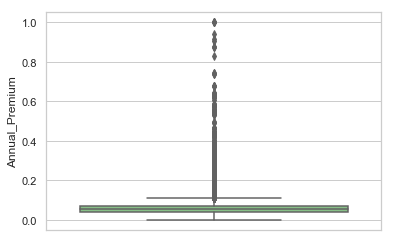

In [39]:
sns.boxplot(y = 'Annual_Premium', data = df,palette='Accent')

C:\Users\Nathanael Theo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


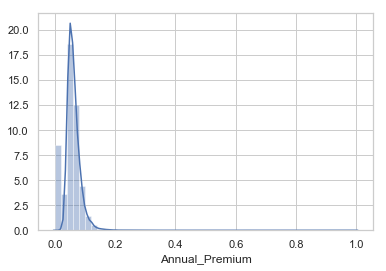

In [40]:
sns.distplot(df.Annual_Premium)

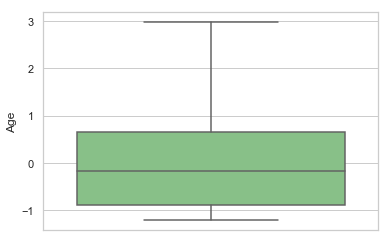

In [41]:
sns.boxplot(y = 'Age', data = df,palette='Accent')

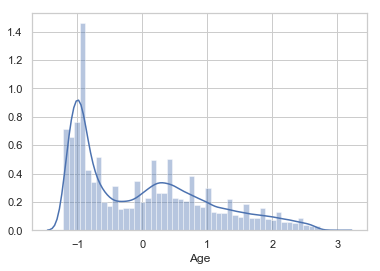

In [42]:
sns.distplot(df.Age)

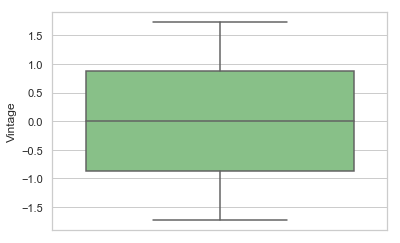

In [43]:
sns.boxplot(y = 'Vintage', data = df,palette='Accent')

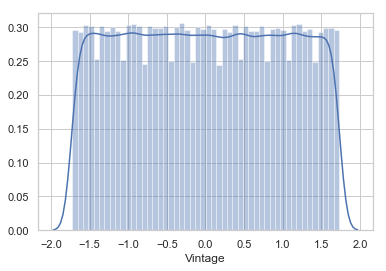

In [44]:
sns.distplot(df.Vintage)

# Strategi Upsampling

In [45]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.Response==0]
df_minority = df[df.Response==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=334399)
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Response.value_counts()

1    334399
0    334399
Name: Response, dtype: int64

In [46]:
df_upsampled.shape

(668798, 216)

In [47]:
df_upsampled.tail(5)

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response,RegionCode_0,RegionCode_1,...,PSC_153,PSC_154,PSC_155,PSC_156,PSC_157,PSC_158,PSC_159,PSC_160,Vehicle_Age_<1yr,Vehicle_Age_1-2yr
id,,,,,,,,,,,,,,,,,,,,,
144764,1,-0.504306,1,0,1,0.000000,0.844408,1,0,0,...,0,0,0,0,1,0,0,0,0,1
43260,1,2.203347,1,0,1,0.141388,0.390249,1,0,0,...,0,0,0,0,0,0,0,0,0,1
289005,0,0.527181,1,0,1,0.068468,-1.127597,1,0,0,...,0,0,0,0,0,0,0,0,0,0
101862,0,0.527181,1,0,1,0.058208,1.477840,1,0,0,...,0,0,0,0,0,0,0,0,0,1
307509,1,0.913989,1,0,1,0.077725,-0.757099,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
df_upsampled.groupby(['Gender'])['Response'].value_counts()

Gender  Response
0       0           156835
        1           130101
1       1           204298
        0           177564
Name: Response, dtype: int64

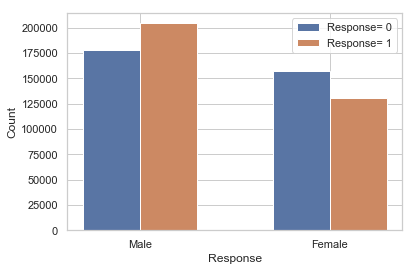

In [49]:
genderresp_up=df_upsampled.groupby(['Response'])['Gender'].value_counts()

barWidth = 0.3
bars1 = [genderresp_up[0,1], genderresp_up[0,0]]
bars2 = [genderresp_up[1,1], genderresp_up[1,0]]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='#5975a4', width=barWidth, edgecolor='white', label='Response= 0')
plt.bar(r2, bars2, color='#cc8963', width=barWidth, edgecolor='white', label='Response= 1')

plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks([0.15,1.15], ['Male', 'Female'])
 
plt.legend()
plt.show()

In [50]:
df_upsampled.groupby(['Driving_License'])['Response'].value_counts()

Driving_License  Response
0                0              771
                 1              317
1                1           334082
                 0           333628
Name: Response, dtype: int64

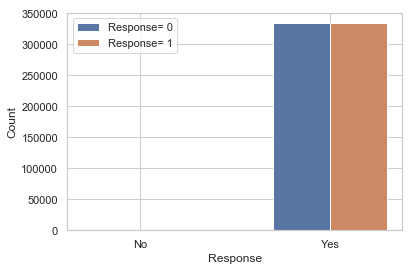

In [51]:
#Driving License and Response
license_resp_up=df_upsampled.groupby(['Response'])['Driving_License'].value_counts()

barWidth = 0.3
bars1 = [license_resp_up[0,0], license_resp_up[0,1]]
bars2 = [license_resp_up[1,0], license_resp_up[1,1]]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='#5975a4', width=barWidth, edgecolor='white', label='Response= 0')
plt.bar(r2, bars2, color='#cc8963', width=barWidth, edgecolor='white', label='Response= 1')

plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks([0.15,1.15], ['No', 'Yes'])
 
plt.legend()
plt.show()

In [52]:
df_upsampled.groupby(['Previously_Insured'])['Response'].value_counts()

Previously_Insured  Response
0                   1           333192
                    0           159929
1                   0           174470
                    1             1207
Name: Response, dtype: int64

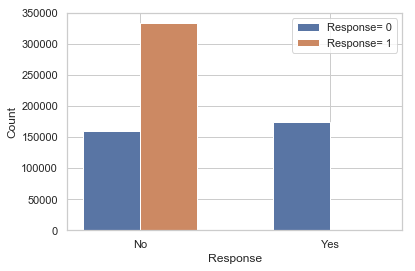

In [53]:
previnsured_resp_up=df_upsampled.groupby(['Response'])['Previously_Insured'].value_counts()

barWidth = 0.3
bars1 = [previnsured_resp_up[0,0], previnsured_resp_up[0,1]]
bars2 = [previnsured_resp_up[1,0], previnsured_resp_up[1,1]]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='#5975a4', width=barWidth, edgecolor='white', label='Response= 0')
plt.bar(r2, bars2, color='#cc8963', width=barWidth, edgecolor='white', label='Response= 1')

plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks([0.15,1.15], ['No', 'Yes'])
 
plt.legend()
plt.show()

In [54]:
df_upsampled.groupby(['Vehicle_Damage'])['Response'].value_counts()

Vehicle_Damage  Response
0               0           187714
                1             7163
1               1           327236
                0           146685
Name: Response, dtype: int64

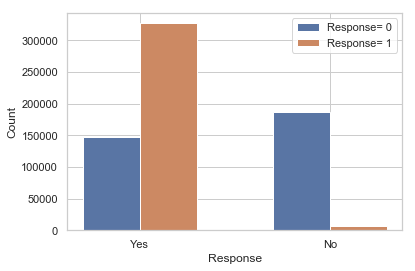

In [55]:
vehicledamage_resp_up=df_upsampled.groupby(['Response'])['Vehicle_Damage'].value_counts()

barWidth = 0.3
bars1 = [vehicledamage_resp_up[0,1], vehicledamage_resp_up[0,0]]
bars2 = [vehicledamage_resp_up[1,1], vehicledamage_resp_up[1,0]]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='#5975a4', width=barWidth, edgecolor='white', label='Response= 0')
plt.bar(r2, bars2, color='#cc8963', width=barWidth, edgecolor='white', label='Response= 1')

plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks([0.15,1.15], ['Yes', 'No'])
 
plt.legend()
plt.show()

In [56]:
from sklearn.model_selection import train_test_split

df_target=df_upsampled['Response']
df1=df_upsampled.drop(['Response'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(df1,df_target,train_size=0.8,random_state=123)

In [57]:
y_train.shape

(535038,)

# Data Modelling and Evaluation

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
import pickle
from sklearn.metrics import accuracy_score
# import packages for hyperparameters tuning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

In [44]:
#Jangan jalankan ini, kecuali ingin fit ulang dengan parameter berbeda
random_search = {'criterion': ['entropy', 'gini'],
                 'max_depth': [5, 6, 12, 14, 15, 20, 25],
                 'min_samples_leaf': [8, 10, 12],
                 'min_samples_split': [4, 9, 12],
                 'n_estimators': [400]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 101.9min finished


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [5, 6, 12, 14, 15, 20, 25],
                                        'min_samples_leaf': [8, 10, 12],
                                        'min_samples_split': [4, 9, 12],
                                        'n_estimators': [400]},
                   random_state=101, verbose=1)

In [88]:
#jangan jalankan ini; untuk save model
import pickle
filename = 'rf_modelupsampling.sav'
pickle.dump(model, open(filename, 'wb'))

In [59]:
#jalankan ini untuk load model upsampling
import pickle
model = pickle.load(open('rf_modelupsampling.sav', 'rb'))

In [60]:
y_pred=model.predict(x_test)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.67      0.78     66739
           1       0.74      0.94      0.83     67021

    accuracy                           0.81    133760
   macro avg       0.83      0.81      0.80    133760
weighted avg       0.83      0.81      0.80    133760



### Formula Precision, Recall, F1-Score <br>
<br>
Precision = $\frac{True Positive}{True Positive + False Positive}$<br>
<br>
Recall = $\frac{True Positive}{True Positive + False Negative}$<br>
<br>
F1-Score = $2 \times \frac{Precision \times Recall}{Precision + Recall}$<br>

In [62]:
print(confusion_matrix(y_test,y_pred))

[[44695 22044]
 [ 3839 63182]]


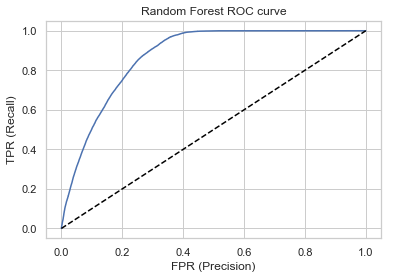

Area under curve (AUC):  0.8723204844237267


In [52]:
y_score = model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)



plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.title('Random Forest ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

In [53]:
model.best_params_

{'n_estimators': 400,
 'min_samples_split': 9,
 'min_samples_leaf': 10,
 'max_depth': 25,
 'criterion': 'entropy'}

In [54]:
accuracy_score(y_test,y_pred)

0.8060556220095694

# Strategi Undersampling

In [64]:
# Separate majority and minority classes
df_majority = df[df.Response==0]
df_minority = df[df.Response==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=46710)
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.Response.value_counts()

1    46710
0    46710
Name: Response, dtype: int64

In [65]:
df_downsampled.groupby(['Gender'])['Response'].value_counts()

Gender  Response
0       0           22019
        1           18185
1       1           28525
        0           24691
Name: Response, dtype: int64

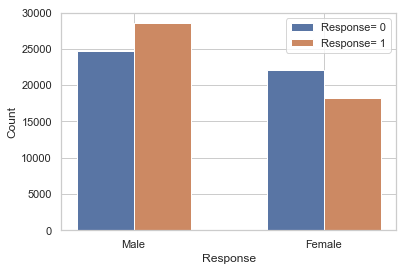

In [66]:
genderresp_up=df_downsampled.groupby(['Response'])['Gender'].value_counts()

barWidth = 0.3
bars1 = [genderresp_up[0,1], genderresp_up[0,0]]
bars2 = [genderresp_up[1,1], genderresp_up[1,0]]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='#5975a4', width=barWidth, edgecolor='white', label='Response= 0')
plt.bar(r2, bars2, color='#cc8963', width=barWidth, edgecolor='white', label='Response= 1')

plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks([0.15,1.15], ['Male', 'Female'])
 
plt.legend()
plt.show()

In [145]:
df_downsampled.groupby(['Driving_License'])['Response'].value_counts()

Driving_License  Response
0                0             121
                 1              41
1                1           46669
                 0           46589
Name: Response, dtype: int64

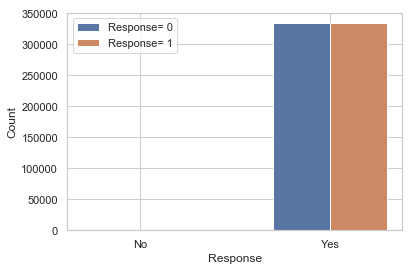

In [67]:
#Driving License and Response
license_resp_up=df_upsampled.groupby(['Response'])['Driving_License'].value_counts()

barWidth = 0.3
bars1 = [license_resp_up[0,0], license_resp_up[0,1]]
bars2 = [license_resp_up[1,0], license_resp_up[1,1]]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='#5975a4', width=barWidth, edgecolor='white', label='Response= 0')
plt.bar(r2, bars2, color='#cc8963', width=barWidth, edgecolor='white', label='Response= 1')

plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks([0.15,1.15], ['No', 'Yes'])
 
plt.legend()
plt.show()

In [146]:
df_downsampled.groupby(['Previously_Insured'])['Response'].value_counts()

Previously_Insured  Response
0                   1           46552
                    0           22390
1                   0           24320
                    1             158
Name: Response, dtype: int64

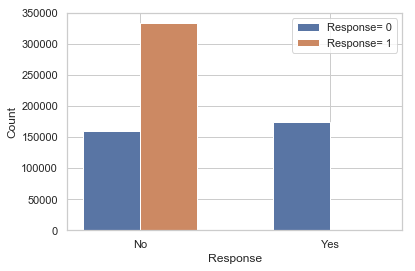

In [68]:
previnsured_resp_up=df_upsampled.groupby(['Response'])['Previously_Insured'].value_counts()

barWidth = 0.3
bars1 = [previnsured_resp_up[0,0], previnsured_resp_up[0,1]]
bars2 = [previnsured_resp_up[1,0], previnsured_resp_up[1,1]]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='#5975a4', width=barWidth, edgecolor='white', label='Response= 0')
plt.bar(r2, bars2, color='#cc8963', width=barWidth, edgecolor='white', label='Response= 1')

plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks([0.15,1.15], ['No', 'Yes'])
 
plt.legend()
plt.show()

In [147]:
df_downsampled.groupby(['Vehicle_Damage'])['Response'].value_counts()

Vehicle_Damage  Response
0               0           26233
                1             982
1               1           45728
                0           20477
Name: Response, dtype: int64

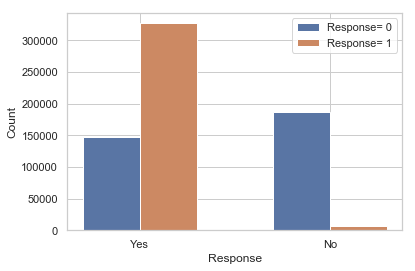

In [69]:
vehicledamage_resp_up=df_upsampled.groupby(['Response'])['Vehicle_Damage'].value_counts()

barWidth = 0.3
bars1 = [vehicledamage_resp_up[0,1], vehicledamage_resp_up[0,0]]
bars2 = [vehicledamage_resp_up[1,1], vehicledamage_resp_up[1,0]]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='#5975a4', width=barWidth, edgecolor='white', label='Response= 0')
plt.bar(r2, bars2, color='#cc8963', width=barWidth, edgecolor='white', label='Response= 1')

plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks([0.15,1.15], ['Yes', 'No'])
 
plt.legend()
plt.show()

In [59]:
df_target2=df_downsampled['Response']
df2=df_downsampled.drop(['Response'],axis=1)
x_train_under,x_test_under,y_train_under,y_test_under = train_test_split(df2,df_target2,train_size=0.8,random_state=123)

In [75]:
#jangan jalankan ini, kecuali fit ulang dgn ganti parameter
random_search = {'criterion': ['entropy', 'gini'],
                 'max_depth': [5, 6, 12, 14, 15, 20, 25],
                 'min_samples_leaf': [8, 10, 12],
                 'min_samples_split': [4, 9, 12],
                 'n_estimators': [400]}

clf = RandomForestClassifier()
model2 = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model2.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  7.4min finished


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [5, 6, 12, 14, 15, 20, 25],
                                        'min_samples_leaf': [8, 10, 12],
                                        'min_samples_split': [4, 9, 12],
                                        'n_estimators': [400]},
                   random_state=101, verbose=1)

In [87]:
#jangan jalankan ini; untuk save model
filename = 'rf_modeldownsampled.sav'
pickle.dump(model2, open(filename, 'wb'))

In [60]:
#jalankan ini utk load model
import pickle
model2 = pickle.load(open('rf_modeldownsampled.sav', 'rb'))

In [68]:
y_pred=model2.predict(x_test_under)
print(classification_report(y_test_under, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.67      0.78      9369
           1       0.74      0.94      0.83      9315

    accuracy                           0.81     18684
   macro avg       0.83      0.81      0.80     18684
weighted avg       0.83      0.81      0.80     18684



In [83]:
print(confusion_matrix(y_test,y_pred))

[[6288 3081]
 [ 542 8773]]


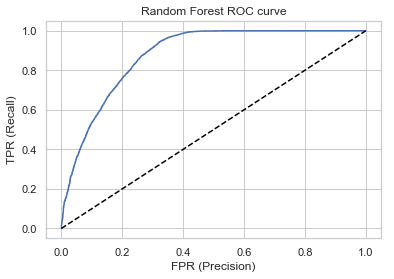

Area under curve (AUC):  0.8783209172997575


In [59]:
y_score = model2.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)



plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.title('Random Forest ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

In [85]:
accuracy_score(y_test,y_pred)

0.8060907728537786

In [86]:
model2.best_params_

{'n_estimators': 400,
 'min_samples_split': 9,
 'min_samples_leaf': 10,
 'max_depth': 25,
 'criterion': 'entropy'}

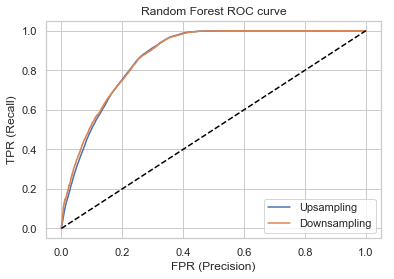

Area under curve (AUC) Upsampling  : 0.8730060584464301
Area under curve (AUC) Downsampling: 0.8762941501383572


In [67]:
y_score_under = model2.predict_proba(x_test_under)[:,1]
fpr_under, tpr_under, _ = roc_curve(y_test_under, y_score_under)

y_score = model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)


plt.plot(fpr,tpr,label= "Upsampling")
plt.plot(fpr_under, tpr_under,label= "Downsampling")
plt.plot((0,1), ls='dashed',color='black')
plt.legend()
plt.title('Random Forest ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.show()
print('Area under curve (AUC) Upsampling  :', auc(fpr,tpr))
print('Area under curve (AUC) Downsampling:', auc(fpr_under, tpr_under))